# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, we have implemented a traffic sign recognition and classifier and the steps are illustrated in more detail in the writeup. 

---
## Step 0: Load The Data

In [19]:
# Load pickled data
import pickle

# Loading the relevant files:
# Training Data: train.p
# Validating Data: valid.p
# Testing Data: test.p

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

print ('Data has been loaded')

Data has been loaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [20]:
# Assuring whether the number of features matches number of labels for all the datasets
assert (len(x_train) == len(y_train))
assert (len(x_test) == len(y_test))

# Number of training examples
n_train = len(x_train)

# Number of testing examples.
n_test = len(x_test)

# Number of validating examples
n_valid = len(x_valid)

# Fetching the size of the image by using the key 'sizes' which stores the size of image
image_shape = x_train[0].shape

# Fetching the number of unique labels

'''
    We have taken the max of labels as the training data consists all the expected ids present
    int the provided .csv file starting from 0, hence we add 1 to the maximum value
'''
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validating examples =", n_valid)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validating examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Visualizing Dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

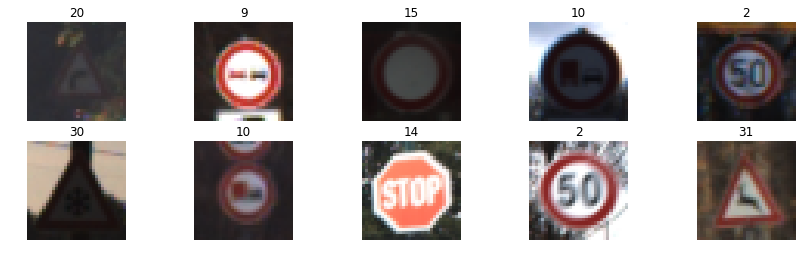

In [21]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

fig, axs = plt.subplots(2,5, figsize=(15, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(x_train))
    image = x_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])


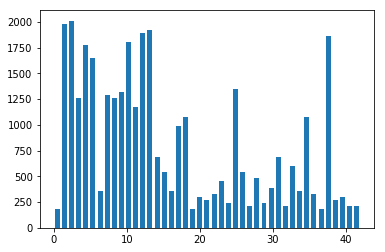

In [22]:
# Visualizing the distribution of data across various labels

import numpy as np

hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

### Plotting a comparison between distribution of data for training and testing dataset

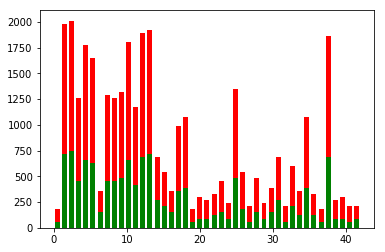

In [23]:
# Visualizing the distribution of training data and testing data
train_hist, train_bins = np.histogram(y_train, bins=n_classes)
test_hist, test_bins = np.histogram(y_test, bins=n_classes)

train_width = 0.7 * (train_bins[1] - train_bins[0])

train_center = (train_bins[:-1] + train_bins[1:]) / 2

test_width = 0.7 * (test_bins[1] - test_bins[0])

test_center = (test_bins[:-1] + test_bins[1:]) / 2

plt.bar(train_center, train_hist, align='center', color='red', width=train_width)
plt.bar(test_center, test_hist, align='center', color='green', width=test_width)
plt.show()

The above diagram shows the histogram distribution of training and testing data.

## Augmenting Data

As we can clearly see the data is not evenly distributed amongst the various labels. A good training set should have evenly distributed data. In this project we will augment the data for labels having dataset less than the average data per label.

In [24]:
# Calculating average data per class

avg = (int)(len(y_train)/n_classes)

print('Average Data Per Class is approx:' , avg)

Average Data Per Class is approx: 809


As mentioned in the research paper [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) we will be augmenting the data by geometric transformation of the original dataset i.e. translating, rotating and scaling the original dataset.

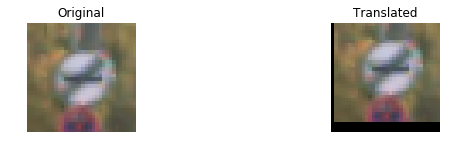

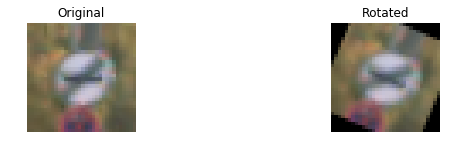

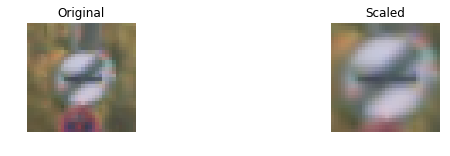

In [25]:
# Augmenting data of those classes who have dataset less than ceil of avg
import cv2 

# Function to translate image by a random value -4 to 4 px
def translate(img):
    tx = (int)(random.uniform(-4, 4))
    ty = (int)(random.uniform(-4, 4))
    
    rows,cols,depth = img.shape
    
    M = np.float32([[1,0,tx],[0,1,ty]])
    return cv2.warpAffine(img,M,(cols,rows))

# Function to rotate image by random value between -30 to 30 degree
def rotate(img):
    theta = (int)(random.uniform(-30, 30))
    
    rows,cols,depth = img.shape
    
    M = cv2.getRotationMatrix2D((cols/2,rows/2), theta,1)
    return cv2.warpAffine(img,M,(cols,rows))

# Function to scale image by random value 0.75 to 1.25
def scale(img):
    rows,cols,ch = img.shape
    
    px = (int)(random.uniform(-8,8))

    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
  
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    return cv2.warpPerspective(img,M,(rows,cols))


# Translating, Rotating and Scaling a sample image
new_img = translate(x_train[90])

fig, axs = plt.subplots(1,2, figsize=(10, 2))

axs[0].axis('off')
axs[0].imshow(x_train[90].squeeze())
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(new_img.squeeze())
axs[1].set_title('Translated')    

new_img = rotate(x_train[90])

fig, axs = plt.subplots(1,2, figsize=(10, 2))

axs[0].axis('off')
axs[0].imshow(x_train[90].squeeze())
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(new_img.squeeze())
axs[1].set_title('Rotated')    

new_img = scale(x_train[90])

fig, axs = plt.subplots(1,2, figsize=(10, 2))

axs[0].axis('off')
axs[0].imshow(x_train[90].squeeze())
axs[0].set_title('Original')

axs[1].axis('off')
axs[1].imshow(new_img.squeeze())
axs[1].set_title('Scaled')    


In [26]:
# Augmenting dataset


for label in range(0, n_classes):
    print('Class', label)
    print('Proccessing->', end='')

    label_indices = np.where(y_train == label)

    n_indices = len(label_indices[0])

    if n_indices < avg:
        for i in range(0, avg - n_indices):
            new_img = x_train[(label_indices[0][i % n_indices])]

            n = random.randint(0,2)

            if n == 0:
                new_img = translate(new_img)
            elif n == 1:
                new_img = rotate(new_img)
            else:
                new_img = scale(new_img)

            x_train =  np.concatenate((x_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [label]), axis=0)

            if i %10 == 0:
                print('*', end='')
    print('Completed')
print('')
print("Augmentation Completed")

Class 0
Proccessing->***************************************************************Completed
Class 1
Proccessing->Completed
Class 2
Proccessing->Completed
Class 3
Proccessing->Completed
Class 4
Proccessing->Completed
Class 5
Proccessing->Completed
Class 6
Proccessing->*********************************************Completed
Class 7
Proccessing->Completed
Class 8
Proccessing->Completed
Class 9
Proccessing->Completed
Class 10
Proccessing->Completed
Class 11
Proccessing->Completed
Class 12
Proccessing->Completed
Class 13
Proccessing->Completed
Class 14
Proccessing->************Completed
Class 15
Proccessing->***************************Completed
Class 16
Proccessing->*********************************************Completed
Class 17
Proccessing->Completed
Class 18
Proccessing->Completed
Class 19
Proccessing->***************************************************************Completed
Class 20
Proccessing->***************************************************Completed
Class 21
Proccessing->**********

## Data Distribution After Augmentation

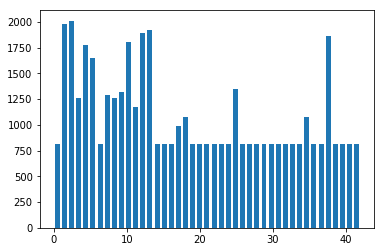

In [27]:
# Visualizing the distribution of data across various labels

import numpy as np

hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

The approach followed to design the model is discussed in the writeup. In a nutshell we have taken LeNet architecture as the base and we have combined some elements from the model mentioned in the paper titled [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). And have added some parts after experimentation.

### Pre-process the Data Set 

Preprocessing includes equalizing the histogram of the image to increase the overall contrast.

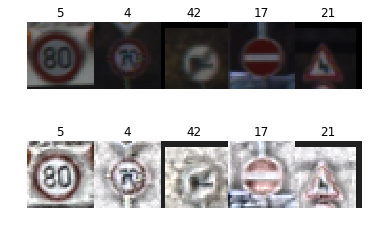

In [28]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import numpy as np
import cv2


# Function to preprocess data
def preprocess(x_data):
    for i in range (0, x_data.shape[0]):
        x_data[i] = cv2.cvtColor(x_data[i], cv2.COLOR_RGB2YUV)
        
        # Equalizing Histogram of each channel using Contrast Limited Adaptive Histogram Equalization (CLAHE)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(4,4))
        x_data[i,:,:,0] = clahe.apply(x_data[i,:,:, 0])
        x_data[i] = cv2.cvtColor(x_data[i], cv2.COLOR_YUV2RGB)
    return x_data



# Shuffling data 
x_train, y_train = shuffle(x_train, y_train)

x_original = np.copy(x_train)

x_train = preprocess(x_train)
x_valid = preprocess(x_valid)
x_test = preprocess(x_test)

# Displaying processed and original images
%matplotlib inline

fig, axs = plt.subplots(2,5)
fig.subplots_adjust(hspace = .2, wspace=.001)

for i in range(5):
    # Ploting original Image
    index = random.randint(0, len(x_train))
    image = x_original[index]
    axs[0,i].axis('off')
    axs[0,i].imshow(image)
    axs[0,i].set_title(y_train[index])
    
    # Plotting Proccessed image
    image = x_train[index ]
    axs[1,i].axis('off')
    axs[1,i].imshow(image,squeexe())
    axs[1,i].set_title(y_train[index])




### Model Architecture

In [29]:
import tensorflow as tf

# Defining number of epochs and batch_size
EPOCHS =  100
BATCH_SIZE = 100

In [30]:
from tensorflow.contrib.layers import flatten

conv1 = None

# Modified LeNet Architecture for training the data
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Weights for each layer
    weights = {'wc1': tf.Variable(tf.truncated_normal((5, 5, 3, 6), mean=mu, stddev=sigma, dtype=tf.float32), name='ConvolutionalWeight1'),
               'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mean=mu, stddev=sigma, dtype=tf.float32), name='ConvolutionalWeight2'),
               'wc3': tf.Variable(tf.truncated_normal((5, 5, 16, 400), mean=mu, stddev=sigma, dtype=tf.float32), name='ConvolutionalWeight3'),
               'wfc1': tf.Variable(tf.truncated_normal((800, 400), mean=mu, stddev=sigma, dtype=tf.float32), name='FullyConnectedLayerWeight1'),
               'wfc2': tf.Variable(tf.truncated_normal((400, 120), mean=mu, stddev=sigma, dtype=tf.float32), name='FullyConnectedLayerWeight2'),
               'wfc3': tf.Variable(tf.truncated_normal((120, 43), mean=mu, stddev=sigma, dtype=tf.float32), name='FullyConnectedLayerWeight3')}
    
    # Biases for each layer
    biases = {'bc1':tf.zeros(6, name='ConvolutionalBias1'), 
              'bc2':tf.zeros(16, name='ConvolutionalBias2'), 
              'bc3':tf.zeros(400, name='ConvolutionalBias3'), 
              'bfc1': tf.zeros(400, name='FullyConnectedLayerBias1'), 
              'bfc2':tf.zeros(120, name='FullyConnectedLayerBias2'), 
              'bfc3':tf.zeros(43, name='FullyConnectedLayerBias3')}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, weights['wc1'], [1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], [1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # Activation.
    conv2 =  tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')

    # Convolution Layer 3 Input = 5x5x16 Output = 1x1x400
    conv3 = tf.nn.conv2d(conv2, weights['wc3'], [1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.bias_add(conv3, biases['bc3'])
    
    # Activation
    conv3 = tf.nn.relu(conv3)
    
    # Flatten. Input = 5x5x16. Output = 400.
    conv3 = flatten(conv3)
    conv2 = flatten(conv2)
    
    res = tf.concat(1, [conv3, conv2])
    
    res = tf.nn.dropout(res, keep_prob)
    
    # Fully Connected. Input = 800. Output = 400.
    fc1 = tf.add(tf.matmul(res, weights['wfc1']), biases['bfc1'])
    
    # Activation.
    fc1 =  tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['wfc3']), biases['bfc3'])
    
    return logits

In [31]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='X-input')
y = tf.placeholder(tf.int32, (None), name='Y-input')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, 43)

# Learning Rate
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaluation Function
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [32]:
# Training Data
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(x_valid, y_valid)
        
        if (i+1)%10 == 0 or i == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    saver.save(sess, './lenet')    
    print("Model trained")


### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Testing Data
print('')
print('-----------------------------------------------------------------------')
with tf.Session() as sess:
    print("Testing...")
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.085

EPOCH 10 ...
Validation Accuracy = 0.869

EPOCH 20 ...
Validation Accuracy = 0.913

EPOCH 30 ...
Validation Accuracy = 0.921

EPOCH 40 ...
Validation Accuracy = 0.928

EPOCH 50 ...
Validation Accuracy = 0.925

EPOCH 60 ...
Validation Accuracy = 0.930

EPOCH 70 ...
Validation Accuracy = 0.929

EPOCH 80 ...
Validation Accuracy = 0.928

EPOCH 90 ...
Validation Accuracy = 0.925

EPOCH 100 ...
Validation Accuracy = 0.930

Model trained

-----------------------------------------------------------------------
Testing...
Test Accuracy = 0.906


---

## Step 3: Test a Model on New Images

To give yourself more insight into how the model is working, we have download six pictures of German traffic signs from the web and have used the model to predict the traffic sign type.

The `signnames.csv` file contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

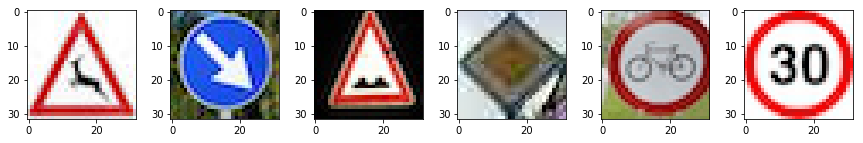

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

%matplotlib inline

# Loading New Images
images = os.listdir('extra_images/')
fig, axs = plt.subplots(1,6, figsize=(15, 2))

i = 0
prediction_images = []

# Plotting Test Images
for image in images:
    img = mpimg.imread('extra_images/' + image)
    axs[i].imshow(img) 
    prediction_images.append(img)
    i=i+1
    
x_predict = np.asarray(prediction_images)

# Storing new images in x_predict array
x_predict = preprocess(x_predict)

# Storing labels for the y_predict
y_predict = [31, 38, 22, 12, 29, 1]

### Selection Criteria for Test Images

The test images are selected keeping in mind the complexity to recognize the sign board. Numerical sign board of 30 kmph speed limit is chosen to test whether the network has the ability to recognize the number amongst various other similar speed limit boards.

Complex designs like of bicycle and the wildlife sign board featuring the dear are selected to see whether the network has the ability to identity complex shapes.

Along with these complex designs, three simpler sign boards namely keep right, bumpy road and priority road are taken to have a comparative study of how well the network work with complex sign boards

### Predict the Sign Type for Each Image

In [34]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=1)

# Predicting image with the stored wights
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    prediction = sess.run(top_k, feed_dict={x: x_predict, keep_prob:1.0})

result = (prediction.indices).reshape((1,-1))[0]

# Displaying Result
print('Prediction:',result)
print('Original labels:', y_predict)

Prediction: [31 38 22 12  6  1]
Original labels: [31, 38, 22, 12, 29, 1]


### Analyze Performance

In [35]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


# Calculating Accuracy of the Network Over New Images
count = 0

for i in range(0,6):
    if y_predict[i] == result[i]:
        count += 1

accuracy = count/6 * 100

print('The accuracy of the network is:', accuracy, '%')

The accuracy of the network is: 83.33333333333334 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, we have printed out the model's softmax probabilities to show the **certainty** of the model's predictions. 


Image  1
Top Labels:
 [31 21 20 19 23]
Top Probabilties:
 [  1.00000000e+00   5.29575197e-14   3.59259199e-14   5.87417137e-15
   8.07232987e-18]
Image  2
Top Labels:
 [38  6 13 34 40]
Top Probabilties:
 [  1.00000000e+00   2.54210974e-31   3.15420434e-35   2.09856449e-36
   4.87785269e-38]
Image  3
Top Labels:
 [22 20 29 30 24]
Top Probabilties:
 [  9.99979496e-01   1.53638575e-05   4.86525596e-06   8.38742906e-08
   5.73266092e-08]
Image  4
Top Labels:
 [12 36 38 39 40]
Top Probabilties:
 [  1.00000000e+00   9.33403987e-25   7.88587454e-26   2.05556776e-27
   5.44669166e-28]
Image  5
Top Labels:
 [ 6 30  0 20 28]
Top Probabilties:
 [ 0.84089714  0.08351681  0.01901046  0.01087721  0.00960497]
Image  6
Top Labels:
 [ 1  4  2 11 25]
Top Probabilties:
 [  9.99923706e-01   6.43919338e-05   3.80725737e-06   2.81225289e-06
   2.77106733e-06]


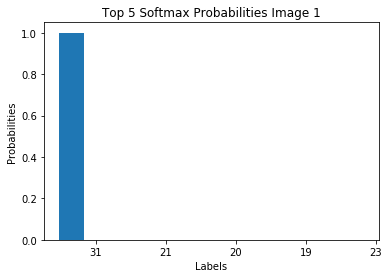

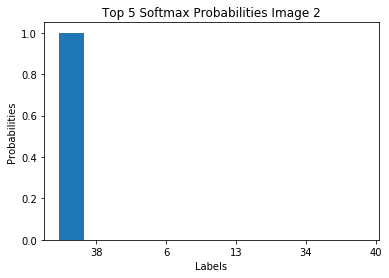

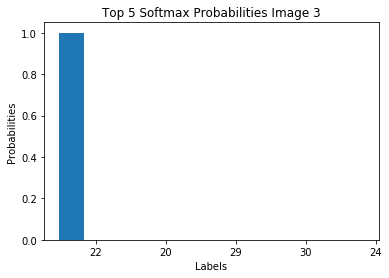

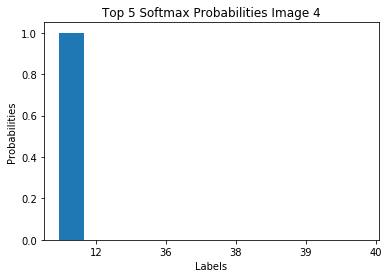

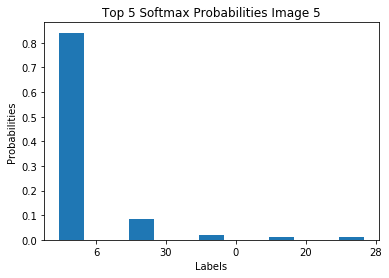

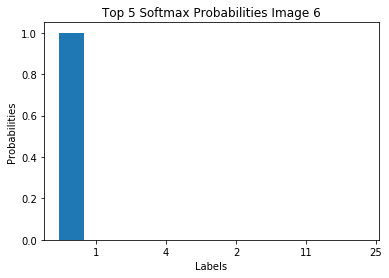

In [36]:
# Printing top 5 softmax pro
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

# Predicting image with the stored wights
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    top_probs =sess.run(top_k, feed_dict={x: x_predict,  keep_prob:1})

    
# Fetching values and the labels   
top_values = top_probs[0]
top_labels = top_probs[1]

N = 5

ind = np.arange(N)
width = 0.35


for i in range(6):
    print("Image ", i+1)
    print("Top Labels:\n", top_labels[i])
    print("Top Probabilties:\n", top_values[i])


for i in range(6):
    plt.figure(i)
    values = top_values[i]
    plt.ylabel('Probabilities')
    plt.xlabel('Labels')
    plt.title('Top 5 Softmax Probabilities Image {}'.format(str(i+1)))
    plt.xticks(ind+width, tuple(top_labels[i]))
    plt.bar(ind, top_values[i], width=width)


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

In [19]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Convolutional Layer 1


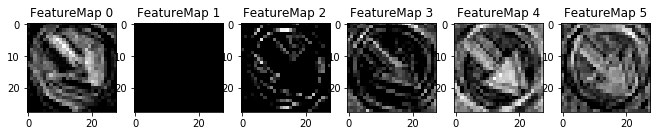

In [20]:
# Constructing a layer in the above model to observe the feature map
# Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
mu = 0
sigma = 0.1

# Weights for each layer
weights = {'wc1': tf.Variable(tf.truncated_normal((5, 5, 3, 6), mean=mu, stddev=sigma, dtype=tf.float32)),
           'wc2': tf.Variable(tf.truncated_normal((5, 5, 6, 16), mean=mu, stddev=sigma, dtype=tf.float32)),
           'wc3': tf.Variable(tf.truncated_normal((5, 5, 16, 400), mean=mu, stddev=sigma, dtype=tf.float32)),
           'wfc1': tf.Variable(tf.truncated_normal((800, 400), mean=mu, stddev=sigma, dtype=tf.float32)),
           'wfc2': tf.Variable(tf.truncated_normal((400, 120), mean=mu, stddev=sigma, dtype=tf.float32)),
           'wfc3': tf.Variable(tf.truncated_normal((120, 43), mean=mu, stddev=sigma, dtype=tf.float32))}

# Biases for each layer
biases = {'bc1':tf.zeros(6), 'bc2':tf.zeros(16), 'bc3':tf.zeros(400), 'bfc1': tf.zeros(400), 'bfc2':tf.zeros(120), 'bfc3':tf.zeros(43)}

# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
conv1 = tf.nn.conv2d(x, weights['wc1'], [1, 1, 1, 1], padding='VALID')
conv1 = tf.nn.bias_add(conv1, biases['bc1'])

# Activation.
conv1 = tf.nn.relu(conv1)

with tf.Session() as sess:
    print("Convolutional Layer 1")
    sess.run(tf.global_variables_initializer())
    outputFeatureMap([x_predict[1]],conv1)

Convolutional Layer 2


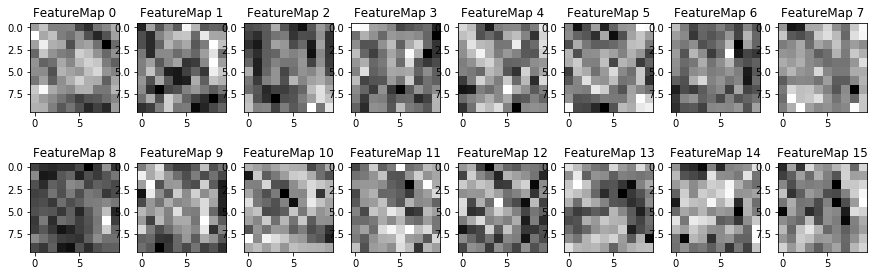

In [21]:
# Pooling. Input = 28x28x6. Output = 14x14x6.
conv1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')

# Layer 2: Convolutional. Output = 10x10x16.
conv2 = tf.nn.conv2d(conv1, weights['wc2'], [1, 1, 1, 1], padding='VALID')
conv2 = tf.nn.bias_add(conv2, biases['bc2'])

with tf.Session() as sess:
    print("Convolutional Layer 2")
    sess.run(tf.global_variables_initializer())
    outputFeatureMap([x_predict[1]],conv2, plt_num=2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

In the above two cells we have displayed the feature map for convolutional layer 1 and 2 for image. In the first layer we can clearly see that the overall structure of the signboard is explored by the layer.

In the second layer, each feature map tries to guess smaller parts of the signboard. Hence, as the layers increase the network tries to learn deeper from the image


### Project Writeup

Project writeup file is provided where detailed explanation about the project is given